

# Setting up the data of AAC descriptor extracted using iLearnPlus

In [1]:
import pandas as pd
pos=pd.read_csv("/content/MiddlePosAAC.csv",header=None)
neg=pd.read_csv("/content/MiddleNegAAC.csv",header=None)
pos.head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,0,0.000000,0.00,0.00000,0.153846,0.000000,0.000000,0.000000,0.076923,0.000000,...,0.00000,0.076923,0.153846,0.000000,0.153846,0.000000,0.000000,0.000000,0.0,0.153846
1,0,0.024390,0.00,0.04878,0.073171,0.048780,0.097561,0.024390,0.048780,0.000000,...,0.02439,0.048780,0.000000,0.121951,0.048780,0.097561,0.024390,0.073171,0.0,0.073171
2,0,0.312500,0.25,0.00000,0.062500,0.000000,0.000000,0.062500,0.000000,0.062500,...,0.00000,0.062500,0.062500,0.000000,0.000000,0.000000,0.062500,0.000000,0.0,0.000000
3,0,0.071429,0.00,0.00000,0.071429,0.035714,0.035714,0.035714,0.000000,0.178571,...,0.00000,0.000000,0.142857,0.142857,0.071429,0.142857,0.000000,0.000000,0.0,0.000000
4,0,0.000000,0.00,0.00000,0.000000,0.000000,0.052632,0.052632,0.052632,0.052632,...,0.00000,0.000000,0.315789,0.000000,0.210526,0.105263,0.052632,0.052632,0.0,0.052632


In [2]:
print(pos.shape)
print(neg.shape)



(17144, 21)
(41713, 21)


In [4]:
#merging data of AAC descriptor
df=pd.concat([pos.head(5000),neg.head(5000)])
df.head()
#print(df1.shape)
#print(df1.shape)

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,0,0.000000,0.00,0.00000,0.153846,0.000000,0.000000,0.000000,0.076923,0.000000,...,0.00000,0.076923,0.153846,0.000000,0.153846,0.000000,0.000000,0.000000,0.0,0.153846
1,0,0.024390,0.00,0.04878,0.073171,0.048780,0.097561,0.024390,0.048780,0.000000,...,0.02439,0.048780,0.000000,0.121951,0.048780,0.097561,0.024390,0.073171,0.0,0.073171
2,0,0.312500,0.25,0.00000,0.062500,0.000000,0.000000,0.062500,0.000000,0.062500,...,0.00000,0.062500,0.062500,0.000000,0.000000,0.000000,0.062500,0.000000,0.0,0.000000
3,0,0.071429,0.00,0.00000,0.071429,0.035714,0.035714,0.035714,0.000000,0.178571,...,0.00000,0.000000,0.142857,0.142857,0.071429,0.142857,0.000000,0.000000,0.0,0.000000
4,0,0.000000,0.00,0.00000,0.000000,0.000000,0.052632,0.052632,0.052632,0.052632,...,0.00000,0.000000,0.315789,0.000000,0.210526,0.105263,0.052632,0.052632,0.0,0.052632


In [5]:
df = df.drop(df.columns[(df == 0).all()], axis=1)


In [6]:
df.shape

(10000, 20)

# Applying Kmean on AAC component only

In [7]:
shuffled_df = df.sample(frac=1).reset_index(drop=True)
X=shuffled_df

In [8]:
import matplotlib.pyplot as plt

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

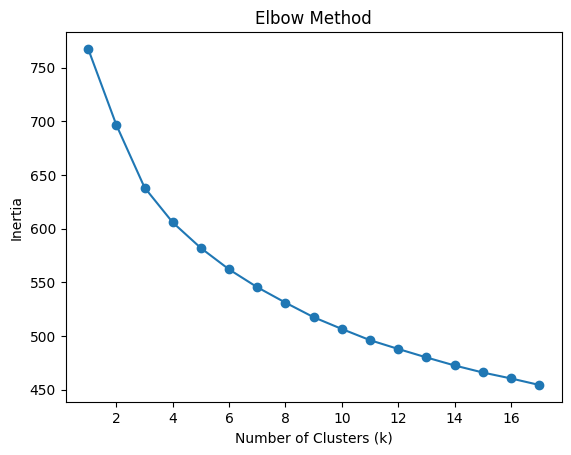

In [9]:
from sklearn.cluster import KMeans

# Perform K-means clustering for different values of k
k_values = range(1, 18)
inertia_values = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia_values.append(kmeans.inertia_)

# Plotting the elbow curve
plt.plot(k_values, inertia_values, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

In [10]:
from sklearn.cluster import KMeans

k=2
kmeans=KMeans(n_clusters=k,random_state=42)
y_pred=kmeans.fit_predict(pos)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [11]:
y_pred is kmeans.labels_

True

In [12]:
kmeans.cluster_centers_

array([[0.        , 0.09241946, 0.01257371, 0.0197508 , 0.02622042,
        0.05154197, 0.06503392, 0.01424726, 0.06390881, 0.19715487,
        0.16556446, 0.0119289 , 0.02479773, 0.02636804, 0.02044301,
        0.0433437 , 0.04099046, 0.02705208, 0.05465781, 0.02688912,
        0.01511347],
       [0.        , 0.06538249, 0.05567171, 0.04337108, 0.04742559,
        0.04656698, 0.08775483, 0.02319031, 0.04335122, 0.04281345,
        0.07133835, 0.01847361, 0.04076785, 0.06822572, 0.03602216,
        0.08403291, 0.06969314, 0.04466118, 0.05236682, 0.02526137,
        0.03362924]])

In [13]:
kmeans.inertia_

1352.5554645506902

In [14]:
from sklearn.metrics import silhouette_score

In [15]:
# Fit the model to the data and get the cluster assignments
labels = kmeans.fit_predict(shuffled_df)

# Ensure that X has the same number of samples as labels
X = shuffled_df

# Calculate the silhouette score
silhouette_avg = silhouette_score(X, labels)

print("Silhouette Score:", silhouette_avg)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score: 0.0925293248465004


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


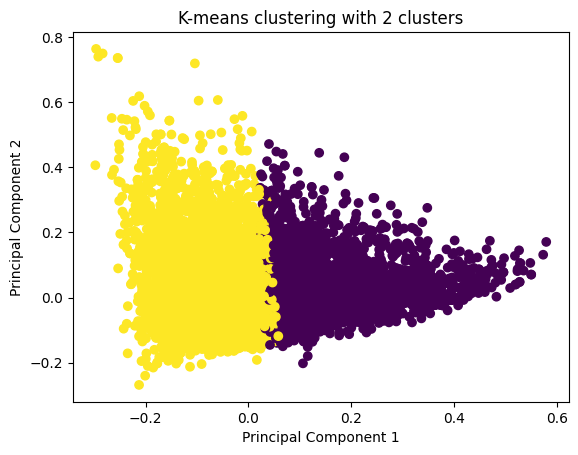

In [16]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA


# Create a K-means clustering model with 2 clusters, using K-means++ initialization
kmeans = KMeans(n_clusters=2, init='k-means++', random_state=42)
y_pred = kmeans.fit_predict(pos)

# Perform PCA dimensionality reduction to 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(pos)

# Create a scatter plot of the reduced data, colored by cluster assignments
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred)
plt.title("K-means clustering with 2 clusters")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

In [17]:
# Count the number of samples in each cluster
import numpy as np
counts = np.bincount(y_pred)

print(f"Number of samples in cluster 0: {counts[0]}")
print(f"Number of samples in cluster 1: {counts[1]}")

Number of samples in cluster 0: 4729
Number of samples in cluster 1: 12415


# Applying DBSCAN

In [18]:
from sklearn.cluster import DBSCAN
dbscan=DBSCAN(eps=0.05,min_samples=5)
dbscan.fit(X)

DBSCAN(eps=0.05)

In [19]:
# Method 3: Silhouette Score
from sklearn.metrics import silhouette_score

best_eps = None
best_min_samples = None
best_score = -1

for eps in np.linspace(0.1, 1.0, num=10):
    for min_samples in range(2, 6):
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        dbscan.fit(X)
        labels = dbscan.labels_
        if len(np.unique(labels)) > 1:
            score = silhouette_score(X, labels)
            if score > best_score:
                best_score = score
                best_eps = eps
                best_min_samples = min_samples

In [20]:
print(f"best_eps :{best_eps}")
print(f"best_min_samples :{best_min_samples}")


best_eps :0.4
best_min_samples :2


In [21]:
dbscan=DBSCAN(eps=0.3,min_samples=2)
dbscan.fit(X)

DBSCAN(eps=0.3, min_samples=2)

In [22]:
# Evaluate using Silhouette Score
labels = dbscan.labels_
silhouette_avg = silhouette_score(X, labels)

print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.4508582481206752


# Applying Agglomerative Clustering

In [23]:
# Apply Agglomerative Clustering
from sklearn.cluster import AgglomerativeClustering


agg_clustering = AgglomerativeClustering(n_clusters=4)
agg_clustering.fit(X)

# Evaluate using Silhouette Score
labels = agg_clustering.labels_
silhouette_avg = silhouette_score(X, labels)

print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.06855202951786221


# GMM

In [24]:
from sklearn.mixture import GaussianMixture
gm = GaussianMixture(n_components=2, n_init=10)
gm.fit(X)

GaussianMixture(n_components=2, n_init=10)

In [25]:
gm.weights_

array([0.60369473, 0.39630527])

In [26]:
gm.means_

array([[0.08213147, 0.0079001 , 0.04887106, 0.05844897, 0.04669442,
        0.0752986 , 0.01760212, 0.06458372, 0.06939868, 0.10709847,
        0.02402012, 0.04380237, 0.04571674, 0.03748155, 0.04940478,
        0.06429624, 0.05012331, 0.06587631, 0.01012247, 0.03112851],
       [0.07411741, 0.060437  , 0.01478703, 0.01556177, 0.04352926,
        0.08253561, 0.0260976 , 0.05304989, 0.12114112, 0.10584041,
        0.01229539, 0.02579271, 0.0468474 , 0.02059268, 0.10488476,
        0.04921559, 0.03588259, 0.05247372, 0.03673097, 0.01818707]])

In [27]:
gm.covariances_

array([[[ 5.04210454e-03, -8.70372772e-05, -3.75256082e-04,
         -1.91579373e-04, -4.57028689e-04, -1.37202346e-04,
         -1.04131925e-04, -3.23909904e-04, -1.17735920e-04,
         -3.83249403e-04, -9.77285530e-05, -4.81477304e-04,
         -3.45049440e-04, -2.14765911e-04, -5.16418422e-04,
         -4.80876189e-04, -2.07019762e-04, -7.94072955e-05,
         -3.16354460e-05, -4.09595300e-04],
        [-8.70372772e-05,  3.98991574e-04,  9.42828315e-05,
          3.15942828e-05, -8.74753690e-05, -3.99501931e-05,
         -1.78515856e-05, -8.39725950e-05, -8.78431402e-05,
         -1.50159519e-04,  7.61703045e-06,  4.34033200e-05,
         -5.18135144e-05,  4.47812409e-05,  6.07849109e-06,
         -1.85780809e-05,  3.12959550e-05, -5.50726792e-05,
         -9.57163674e-06,  3.22808646e-05],
        [-3.75256082e-04,  9.42828315e-05,  2.98291094e-03,
          1.53893058e-04, -1.68630270e-04, -4.28329057e-04,
          2.69384148e-05, -2.81970069e-04, -2.64155001e-04,
         -8.

In [28]:
gm.converged_

True

In [29]:
gm.n_iter_

27

Silhouette Score: 0.07262867206801273


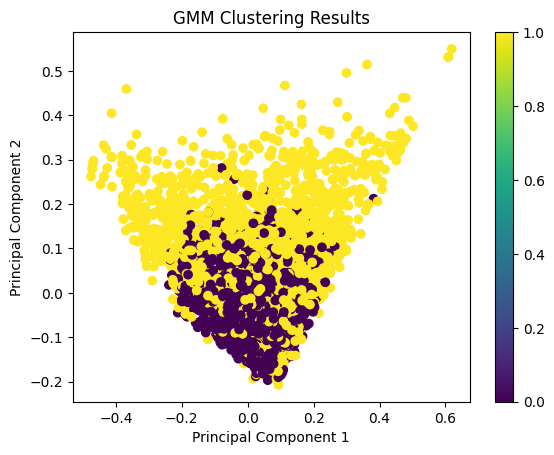

In [30]:
predicted_labels = gm.predict(X)

# Calculate the Silhouette Score
silhouette_avg = silhouette_score(X, predicted_labels)
print(f"Silhouette Score: {silhouette_avg}")

# Visualize the clustering results
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=predicted_labels, cmap='viridis')
plt.title("GMM Clustering Results")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar()
plt.show()